    Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fichero = pd.read_csv("data/coste_vida_reducido.csv")

## Objectivos

1.  Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
- Percentiles 25, 75
- Rango Intercualtílico
- Boxplot de algunas variables
- Tabla de frecuencias
    - Variables cualitativas
    - Variables cuantitativas
    - Frecuencia acumulada
    - Representación de al menos una tabla de frecuencias

In [3]:
#Utilizamos el mismo fichero pero para no repetir datos usaremos India como referencia

fichero_in = fichero[fichero["pais"]== "India"]

In [4]:
#Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
media_in = round(fichero_in["Salario neto mensual"].mean(),2)
median_in = fichero_in["Salario neto mensual"].median()
moda_in = fichero_in["Salario neto mensual"].mode()[0]
max_in = fichero_in["Salario neto mensual"].max()
min_in = fichero_in["Salario neto mensual"].min()

In [5]:
print(f"La media del sueldo en India, calculados en dollares americanos es de {media_in}, la mediana es de {median_in}, la moda es de {moda_in}. El salario maximo en India es de {max_in}, mientras el valor minimo es {min_in}")

La media del sueldo en India, calculados en dollares americanos es de 432.56, la mediana es de 408.09, la moda es de 367.28. El salario maximo en India es de 1101.84, mientras el valor minimo es 178.74


In [6]:
#Percentiles 25, 75 - hemos decidido utilizar el nanpercentile porque sabemos que hay nulos en esta columna.
q1, q3 = np.nanpercentile(fichero_in["Salario neto mensual"], [25, 75])

In [7]:
print(f"El percentil 25 es {q1} y el percentil 75 es {q3} ")

El percentil 25 es 306.07 y el percentil 75 es 530.51 


In [8]:
#Rango Intercualtílico

iqr = q3 - q1
print(f"El rango intercualtílico es de {iqr.round(2)} ")

El rango intercualtílico es de 224.44 


In [9]:
#Boxplot de algunas variables

Text(0.5, 1.0, 'Salario en India')

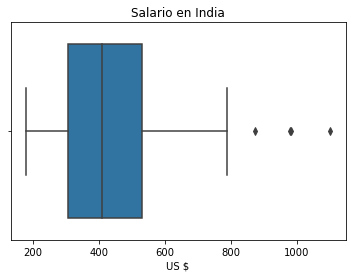

In [9]:
plt.figure()

fig = sns.boxplot(x = "Salario neto mensual", data = fichero_in)

fig.set(xlabel = "US $")

fig.set_title("Salario en India")


In [10]:
fichero_it = fichero[fichero["pais"] == "Italy"]
fichero_br = fichero[fichero["pais"] == "Brazil"]
fichero_uk = fichero[fichero["pais"] == "United Kingdom"]

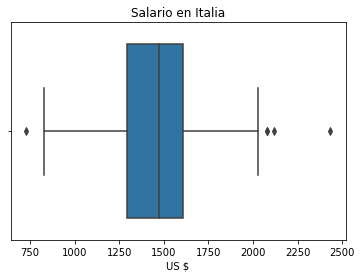

In [11]:
plt.figure()

fig = sns.boxplot(x = "Salario neto mensual", data = fichero_it)

fig.set(xlabel = "US $")

fig.set_title("Salario en Italia");

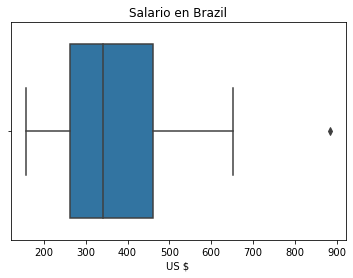

In [12]:
plt.figure()

fig = sns.boxplot(x = "Salario neto mensual", data = fichero_br)

fig.set(xlabel = "US $")

fig.set_title("Salario en Brazil");

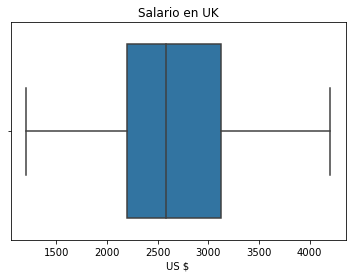

In [13]:
plt.figure()

fig = sns.boxplot(x = "Salario neto mensual", data = fichero_uk)

fig.set(xlabel = "US $")

fig.set_title("Salario en UK");

In [14]:
# Tabla de frecuencias - Variables cualitativas

# Volvemos a la tabla de India y vamos a crear una columna para categorizar el sueldo y así hacer la tabla.


def cat_sueldo(column): 
    if column <= q1:
        return "Bajo"
    elif q1 < column <=q3:
        return "Medio"
    else:
        return "Alto"


fichero_in["categoria_sueldo"] = (fichero_in["Salario neto mensual"].apply(cat_sueldo))



/var/folders/66/3gn2x5sj3tlfxjp4wp1zg9n00000gn/T/ipykernel_12212/2773507437.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichero_in["categoria_sueldo"] = (fichero_in["Salario neto mensual"].apply(cat_sueldo))


In [15]:
# Tabla de frecuencias - Variables cualitativas
frecuencias_categoricas_in = fichero_in.groupby("categoria_sueldo").count().reset_index()
frecuencias_categoricas_in

,categoria_sueldo,Unnamed: 0,ciudad,pais,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,Salario neto mensual,pesos_pais
0,Alto,76,76,76,74,73,74,68,64,63,49,49,48,50,33,30,30,76
1,Bajo,33,33,33,33,32,32,31,29,30,32,31,31,31,25,25,33,33
2,Medio,58,58,58,58,58,58,56,56,57,57,57,56,56,51,48,58,58


In [16]:
#Tabla de frecuencias - Variables cuantitativas

fichero_salario = fichero_in.groupby("Salario neto mensual").count().reset_index().sort_values(by = "ciudad", ascending = False)
fichero_salario.head()

,Salario neto mensual,Unnamed: 0,ciudad,pais,leche,arroz,huevos,filetes de pollo,manzanas,tomates,Apartamento 1 habitación centro,Apartamento 1 habitación fuera del centro,Apartamento tres habitaciones en centro,tres habitaciones fuera centro,Precio por metro cuadrado en centro,Precio por metro cuadrado fuera centro,pesos_pais,categoria_sueldo
20,367.28,10,10,10,10,10,10,9,8,10,10,10,10,10,8,7,10,10
7,244.85,9,9,9,9,9,9,8,8,8,9,9,9,9,5,6,9,9
11,306.07,9,9,9,9,8,8,8,7,7,8,7,8,7,8,7,9,9
34,489.71,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,8,8
25,428.49,6,6,6,6,6,6,5,6,6,5,5,5,5,5,5,6,6


In [17]:
print(f"La media del sueldo en India, calculados en dollares americanos es de {media_in}, la mediana es de {median_in}, la moda es de {moda_in}.")

print()

print(f"El salario maximo en India es de {max_in}, mientras el valor minimo es {min_in}")

La media del sueldo en India, calculados en dollares americanos es de 432.56, la mediana es de 408.09, la moda es de 367.28.

El salario maximo en India es de 1101.84, mientras el valor minimo es 178.74


In [18]:
desviacion = fichero_in["Salario neto mensual"].std()
round(desviacion,2)

173.03

2. Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Concluimos con los datos de India que es un sueldo medio muy bajo, aunque no hemos podido ver el nivel adquisitivo respecto a la alimentación o vivienda. Creemos que es un país más bien pobre, menos consumista con lo cual también reduce los salarios.

- Vemos que la moda es menor que la media y la mediana, con lo cual entendemos que hay valores máximos que suben la media.
- Hemos sacado también la desviación típica por curiosidad y vemos que es de 173.03 dolares, que para una mediana de 408.09 dolares es bastante alta,casi un 50%.
- Comparando los boxplots de los salarios en los otros paises nos damos cuenta de que Brasil e India tienen salarios más bajos y Reino Unido e Italia tienen sueldos más altos. Paises donde la capacidad de ocio es mayor tienden a tener mayores sueldos para promover el consumo.